In [95]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4.8
#15, 6

In [96]:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')

dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y %H:%M')
data = pd.read_csv('D:/Development/livros/source/hs_users_3.csv',sep=';', parse_dates=['DATE'],index_col='DATE',date_parser=dateparse)
#dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y %H:%M')
#data = pd.read_csv('C:/Users/C00310965/Documents/livros/source/train_test_lago_sul_20160907_20160930.csv',sep=',', parse_dates=['date'],index_col='date',date_parser=dateparse)
print data.head()
print '\n Data Types:'
print data.dtypes

                     users
DATE                      
2017-01-01 11:00:00   43.0
2017-01-01 12:00:00   47.0
2017-01-01 13:00:00   43.5
2017-01-01 14:00:00   47.0
2017-01-01 15:00:00   47.0

 Data Types:
users    float64
dtype: object


In [161]:
train_set = data['2017-01-01 11:00:00':'2017-03-14 22:00:00']
test_set = data['2017-03-15 11:00:00':'2017-04-20 22:00:00']
data_total = data['2017-01-01 00:00:00':'2017-04-20 22:00:00'] 
print(train_set.shape)
print(test_set.shape)
print(data_total.shape)
print(train_set.shape[0]+test_set.shape[0])

(851, 1)
(427, 1)
(1278, 1)
1278


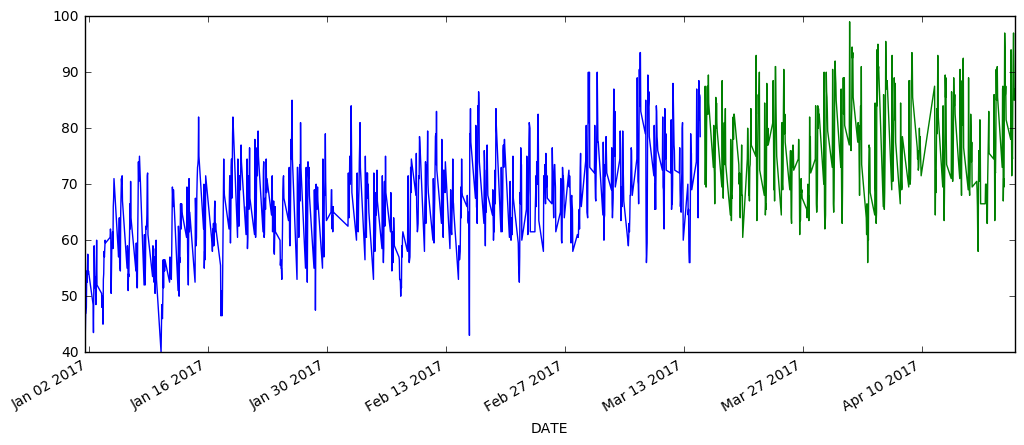

In [162]:
train = train_set['users']
test = test_set['users']
train.plot()
test.plot()
#ts.head(10)

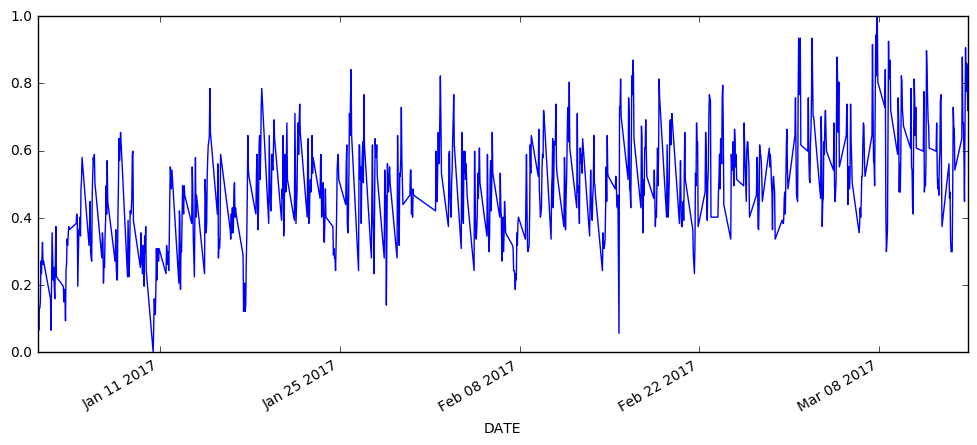

In [99]:
max_value = train.max()
min_value = train.min()
ts = (train - train.min()) / (train.max() - train.min())
denorm = ts*(max_value-min_value)+min_value
#denorm.plot()
ts.plot()

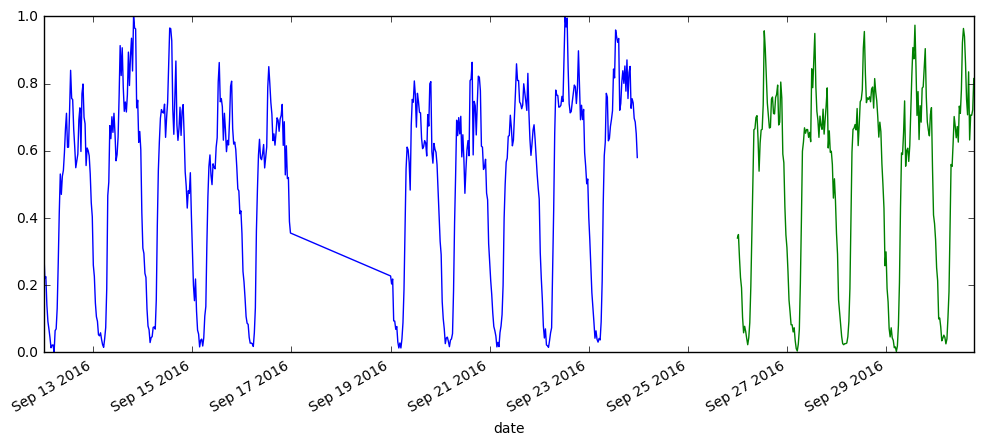

In [320]:
#ts.plot(use_index=False)
train_size = int(len(ts) * 0.674682)
train = ts[0:train_size]
#test_size = len(dataset) - train_size
test = ts[train_size:]
train.plot()
test.plot()


In [166]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=84)
    rolstd = pd.rolling_std(timeseries, window=84)

    #Plot rolling statistics:
    orig = timeseries.plot(color='blue',label='Original',use_index=False)
    mean = rolmean.plot(color='red', label='Media Movel',use_index=False)
    std = rolstd.plot(color='black', label = 'Desvio Padrao',use_index=False)    
    #orig = plt.plot(timeseries, color='blue',label='Original')
    #mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    #std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Usuarios HSDPA (Diferenciacao)')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Resultados do teste Dickey-Fuller:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Teste estatistico','p-value','#Lags Usado','# Observacoes usado'])
    for key,value in dftest[4].items():
        dfoutput['Valor Critico (%s)'%key] = value
    print dfoutput

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=84,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=84,center=False).std()


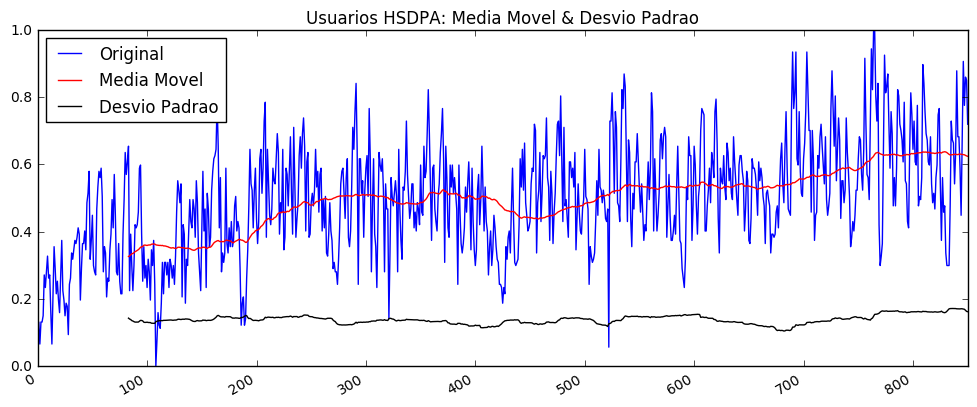

Resultados do teste Dickey-Fuller:
Teste estatistico       -4.135775
p-value                  0.000845
#Lags Usado             17.000000
# Observacoes usado    833.000000
Valor Critico (5%)      -2.865016
Valor Critico (1%)      -3.438225
Valor Critico (10%)     -2.568621
dtype: float64


In [26]:
test_stationarity(ts)

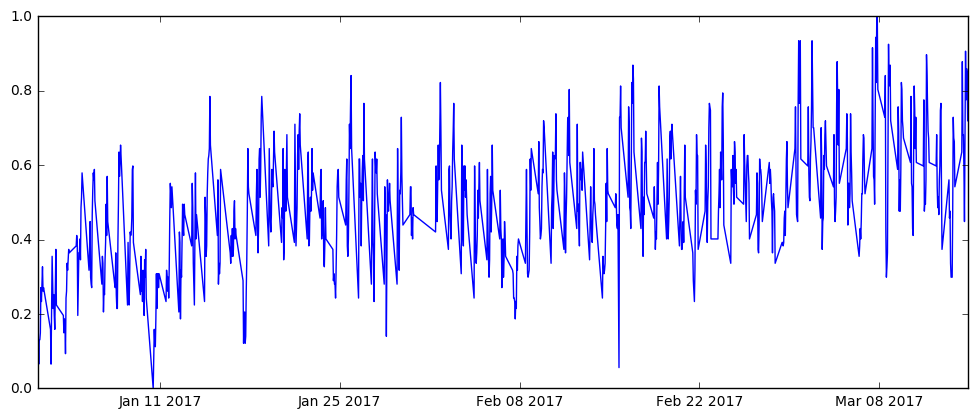

In [163]:
#ds_log = np.log(ts)
ds_log = ts
ds_log.dropna(inplace=True)
plt.plot(ds_log)

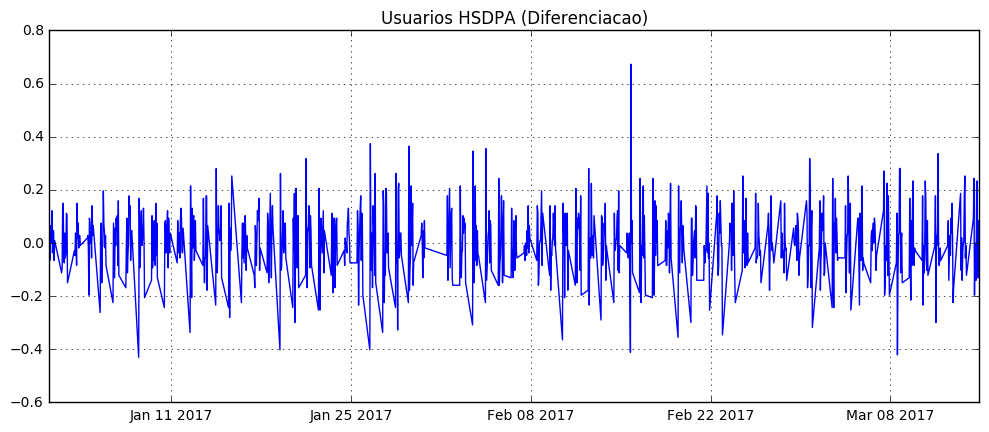

In [165]:
#ds_log_diff = ds_log - ds_log.shift()
plt.title('Usuarios HSDPA (Diferenciacao)')
plt.grid()
plt.plot(ds_log_diff)

In [33]:
max_value = ds_log_diff.max()
min_value = ds_log_diff.min()
ds_log_diff = (ds_log_diff - ds_log_diff.min()) / (ds_log_diff.max() - ds_log_diff.min())
denorm = ds_log_diff*(max_value-min_value)+min_value

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=84,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=84,center=False).std()


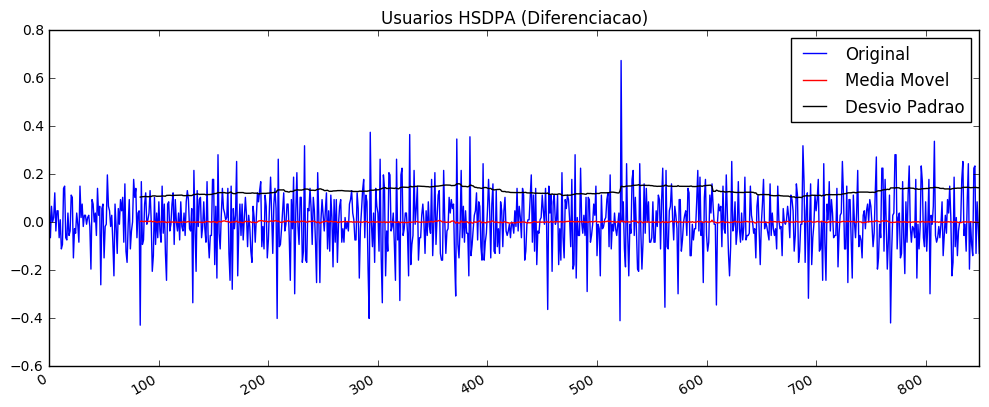

Resultados do teste Dickey-Fuller:
Teste estatistico     -8.905624e+00
p-value                1.139971e-14
#Lags Usado            2.100000e+01
# Observacoes usado    8.280000e+02
Valor Critico (5%)    -2.865037e+00
Valor Critico (1%)    -3.438272e+00
Valor Critico (10%)   -2.568632e+00
dtype: float64


In [167]:
ds_log_diff.dropna(inplace=True)
test_stationarity(ds_log_diff)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=84,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=84,center=False).std()


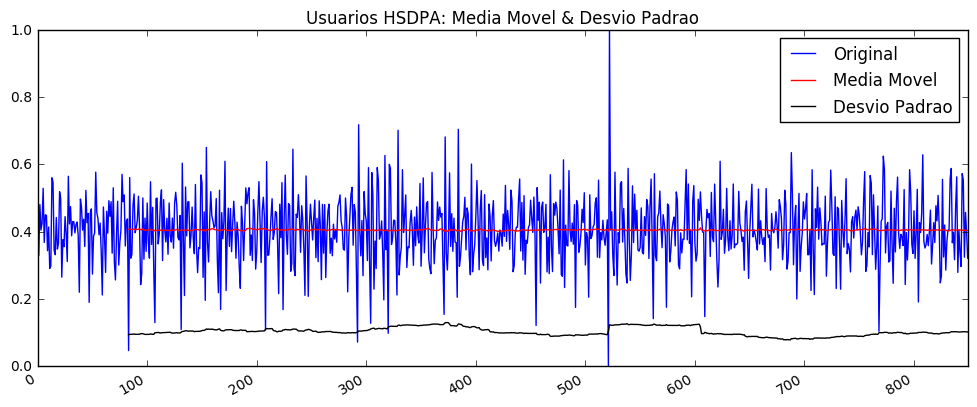

Resultados do teste Dickey-Fuller:
Teste estatistico     -8.998625e+00
p-value                6.589648e-15
#Lags Usado            2.100000e+01
# Observacoes usado    8.280000e+02
Valor Critico (5%)    -2.865037e+00
Valor Critico (1%)    -3.438272e+00
Valor Critico (10%)   -2.568632e+00
dtype: float64


In [34]:
ds_log_diff.dropna(inplace=True)
test_stationarity(ds_log_diff)

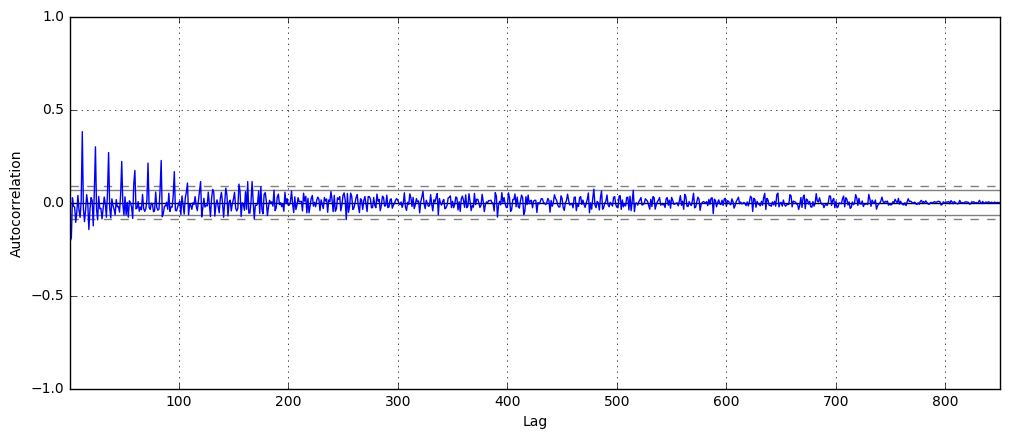

In [24]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(ds_log_diff)
plt.show()

In [103]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [104]:
lag_acf = acf(ds_log_diff, nlags=50)
lag_pacf = pacf(ds_log_diff, nlags=50, method='ols')

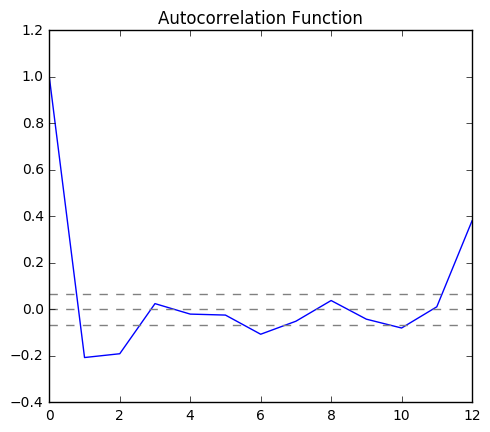

In [37]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ds_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ds_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

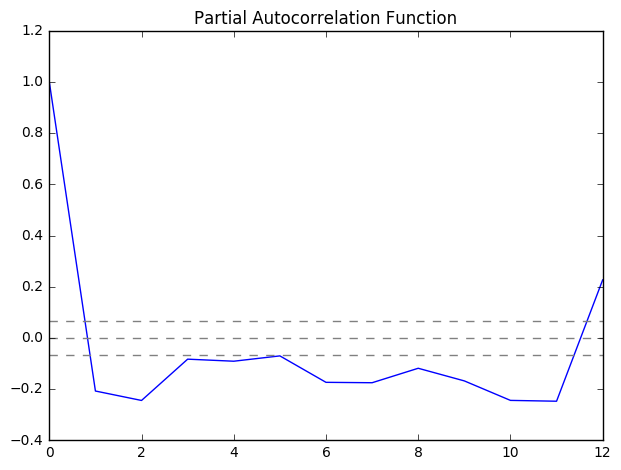

In [28]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

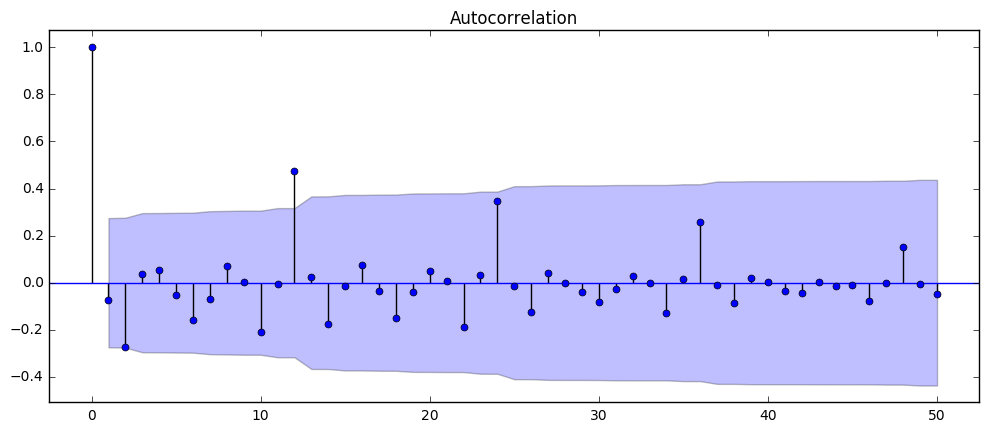

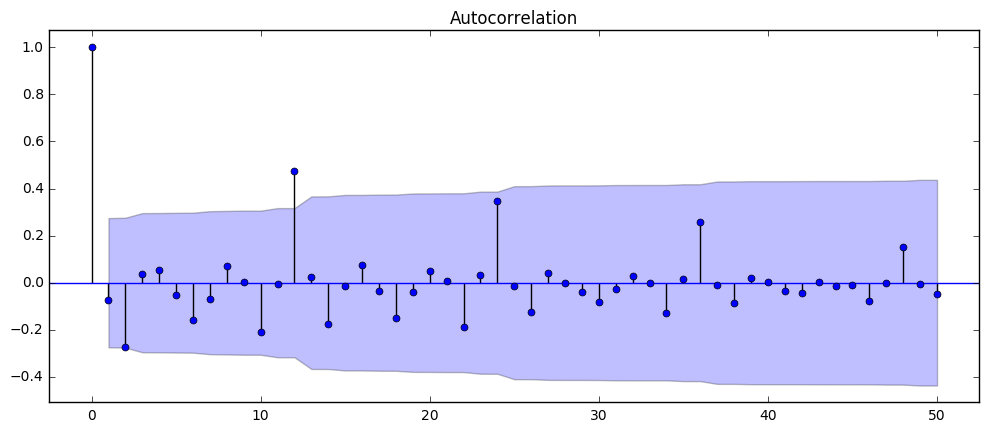

In [105]:
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(lag_acf)
#label('Autocorrelation Function')

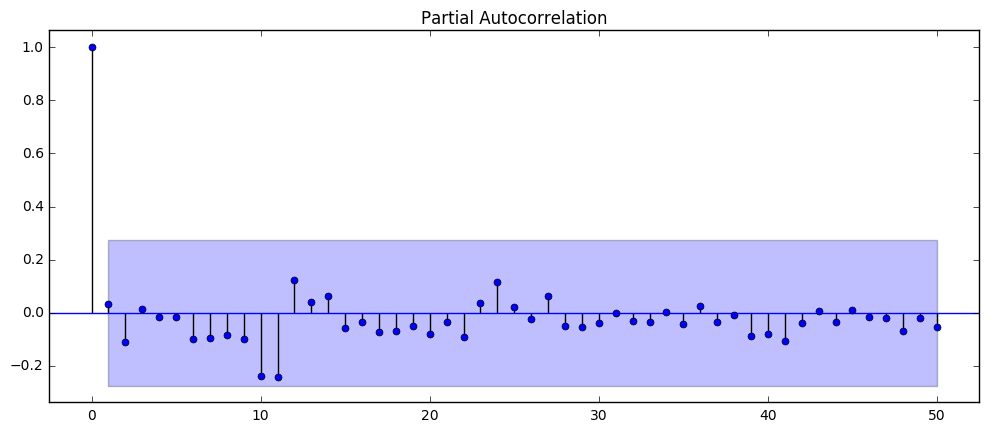

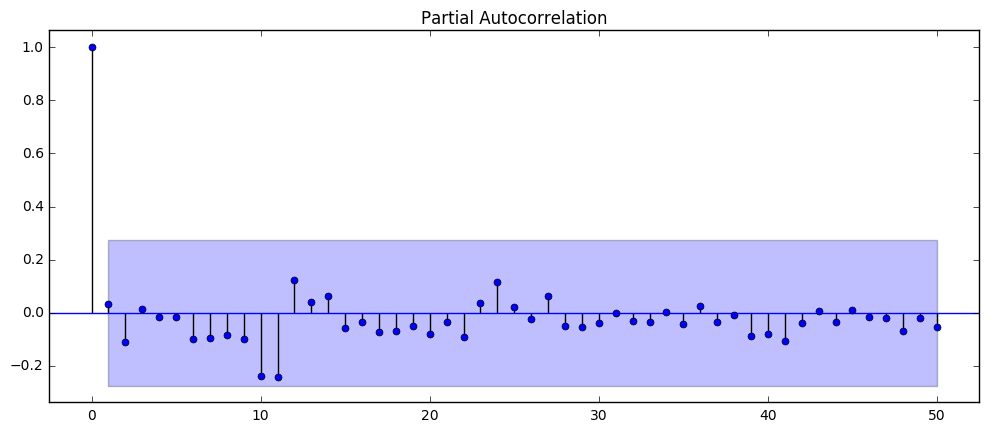

In [106]:
tsaplots.plot_pacf(lag_pacf)
#label('PACF - Volume de dados')

In [86]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [75]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


predicted=76.922459, expected=70.000000
predicted=71.877271, expected=87.500000
predicted=82.291810, expected=78.000000
predicted=76.723353, expected=69.500000
predicted=71.701997, expected=69.500000
predicted=71.673002, expected=80.500000
predicted=78.179657, expected=85.000000
predicted=80.908735, expected=87.500000
predicted=82.491217, expected=84.000000
predicted=80.503188, expected=82.500000
predicted=79.680182, expected=89.500000
predicted=83.935067, expected=84.500000
predicted=81.051689, expected=73.000000
predicted=74.239819, expected=80.500000
predicted=78.710117, expected=73.500000
predicted=74.572790, expected=72.000000
predicted=73.667259, expected=66.500000
predicted=70.356730, expected=73.000000
predicted=74.186931, expected=77.500000
predicted=76.861846, expected=85.500000
predicted=81.656000, expected=80.000000
predicted=78.449921, expected=84.500000
predicted=81.175262, expected=81.000000
predicted=79.154933, expected=79.500000
predicted=78.302727, expected=69.500000


C:\Anaconda2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=83.803636, expected=86.500000
predicted=81.886035, expected=85.500000
predicted=81.402834, expected=83.000000
predicted=80.015009, expected=79.500000
predicted=78.013418, expected=73.000000
predicted=74.222218, expected=90.500000
predicted=84.494930, expected=76.500000
predicted=76.373684, expected=66.500000
predicted=70.538045, expected=65.000000
predicted=69.593417, expected=67.500000
predicted=70.984417, expected=76.000000
predicted=75.915193, expected=89.000000
predicted=83.550718, expected=92.000000
predicted=85.447098, expected=89.500000
predicted=84.105800, expected=88.000000
predicted=83.323895, expected=85.000000
predicted=81.635359, expected=73.000000
predicted=74.621930, expected=87.000000
predicted=82.834300, expected=72.000000
predicted=74.100259, expected=63.500000
predicted=69.090834, expected=63.000000
predicted=68.706585, expected=69.500000
predicted=72.453176, expected=82.000000
predicted=79.760786, expected=89.000000
predicted=83.925374, expected=82.500000


C:\Anaconda2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=84.395863, expected=93.500000
predicted=87.361489, expected=92.000000
predicted=86.575178, expected=85.500000
predicted=82.860022, expected=76.500000
predicted=77.672266, expected=74.500000
predicted=76.509223, expected=76.000000
predicted=77.368271, expected=72.500000
predicted=75.332499, expected=73.000000
predicted=75.602948, expected=74.500000
predicted=76.456947, expected=80.000000
predicted=79.639626, expected=77.000000
predicted=77.910141, expected=78.500000
predicted=78.780301, expected=76.000000
predicted=77.335007, expected=73.500000
predicted=75.878843, expected=71.500000
predicted=74.700693, expected=87.000000
predicted=83.672715, expected=87.500000
predicted=84.009256, expected=71.500000
predicted=74.777882, expected=64.500000
predicted=70.690325, expected=72.500000
predicted=75.275924, expected=68.500000
predicted=72.932186, expected=77.000000
predicted=77.826309, expected=83.500000
predicted=81.596999, expected=79.000000
predicted=79.014216, expected=82.000000


C:\Anaconda2\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Anaconda2\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: invalid value encountered in divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Anaconda2\lib\site-packages\statsmodels\tsa\tsatools.py:629: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Anaconda2\lib\site-packages\statsmodels\tsa\tsatools.py:629: RuntimeWarning: invalid value encountered in divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


predicted=86.009228, expected=83.000000
predicted=81.590487, expected=75.500000
predicted=77.306093, expected=72.500000
predicted=75.576178, expected=68.000000
predicted=72.966996, expected=81.000000
predicted=80.392713, expected=88.500000
predicted=84.889163, expected=80.500000
predicted=80.166148, expected=91.500000
predicted=86.632955, expected=92.500000
predicted=87.247243, expected=76.500000
predicted=78.089018, expected=69.000000
predicted=73.784818, expected=89.000000
predicted=85.213040, expected=71.500000
predicted=75.171334, expected=69.000000
predicted=73.719013, expected=68.000000
predicted=73.106110, expected=71.000000
predicted=74.773985, expected=75.500000
predicted=77.314025, expected=82.500000
predicted=81.303369, expected=80.000000
predicted=79.894677, expected=74.000000
predicted=76.478747, expected=77.500000
predicted=78.458848, expected=69.500000
predicted=73.891966, expected=70.500000
predicted=74.420914, expected=69.000000
predicted=73.523861, expected=66.000000


NameError: name 'pyplot' is not defined

In [83]:
history

[43.0,
 47.0,
 43.5,
 47.0,
 47.0,
 48.0,
 54.5,
 52.5,
 55.0,
 57.5,
 54.0,
 54.5,
 48.5,
 43.5,
 51.0,
 59.0,
 55.5,
 51.5,
 53.5,
 50.5,
 48.5,
 54.5,
 60.0,
 52.0,
 50.5,
 48.0,
 50.0,
 49.5,
 45.0,
 53.0,
 54.0,
 58.0,
 57.0,
 58.5,
 60.0,
 59.5,
 60.5,
 62.0,
 61.0,
 50.5,
 55.5,
 59.5,
 59.5,
 61.5,
 58.5,
 66.0,
 67.5,
 71.0,
 57.0,
 60.0,
 64.0,
 56.0,
 55.0,
 54.5,
 65.0,
 68.5,
 71.0,
 70.0,
 71.5,
 67.0,
 55.0,
 59.0,
 58.0,
 51.0,
 54.0,
 53.5,
 58.5,
 61.0,
 66.5,
 62.0,
 70.5,
 64.0,
 55.0,
 54.5,
 59.5,
 53.5,
 51.5,
 51.5,
 61.0,
 66.5,
 74.0,
 70.5,
 72.5,
 75.0,
 52.0,
 61.0,
 56.0,
 52.0,
 56.0,
 62.5,
 62.0,
 62.5,
 64.5,
 71.5,
 72.0,
 61.0,
 53.5,
 59.0,
 54.0,
 56.0,
 52.5,
 57.0,
 55.0,
 50.5,
 58.5,
 56.0,
 60.0,
 53.0,
 40.0,
 44.0,
 48.5,
 46.5,
 46.0,
 50.0,
 56.5,
 51.5,
 56.5,
 56.5,
 54.5,
 56.5,
 52.5,
 57.0,
 56.0,
 54.0,
 56.0,
 53.0,
 57.5,
 64.5,
 69.5,
 68.0,
 66.0,
 69.0,
 51.0,
 62.5,
 61.0,
 50.0,
 57.0,
 56.0,
 61.0,
 66.5,
 63.0,
 62.0,
 66.5,

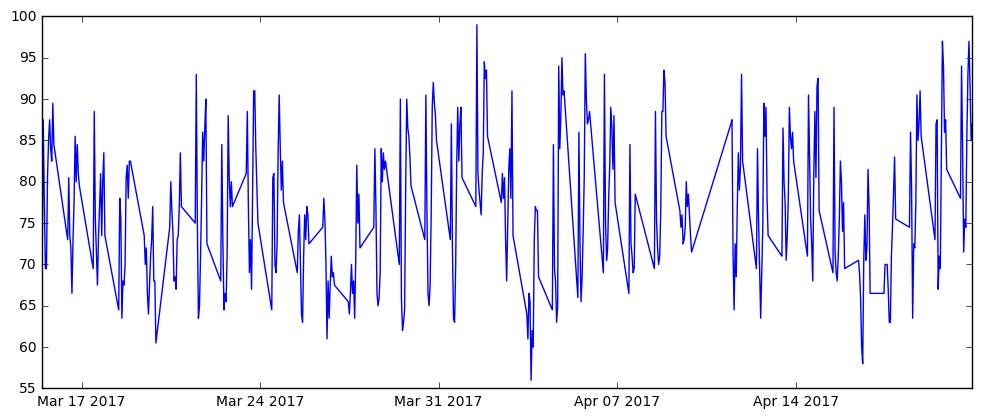

In [78]:
#error = mean_squared_error(test, predictions)
#print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
#plt.plot(predictions, color='red')
plt.show()

C:\Anaconda2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


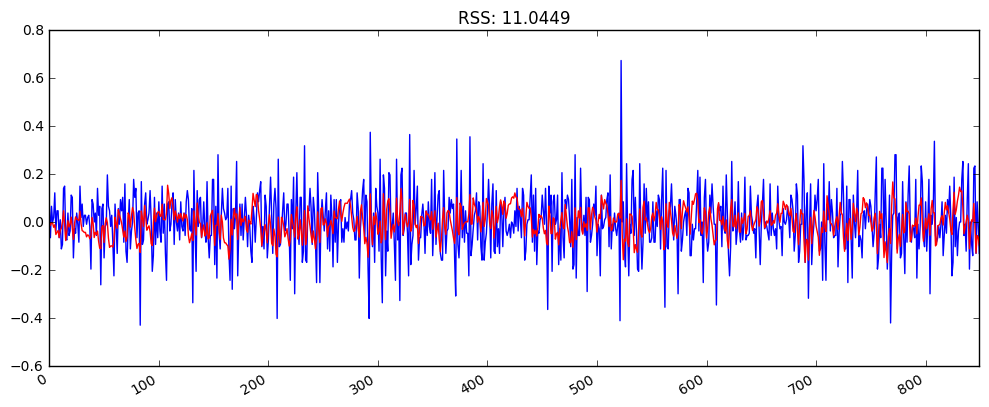

In [111]:
model = ARIMA(ds_log, order=(4, 1, 1))
results_ARIMA = model.fit(disp=-1)  
ds_log_diff.plot(use_index=False)
results_ARIMA.fittedvalues.plot(color='red',use_index=False)
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ds_log_diff)**2))
#results_ARIMA.plot_predict(468, 600, dynamic=True, plot_insample=False).plot

                              ARMA Model Results                              
Dep. Variable:                  users   No. Observations:                  427
Model:                     ARMA(1, 1)   Log Likelihood                 153.157
Method:                       css-mle   S.D. of innovations              0.169
Date:                Mon, 11 Sep 2017   AIC                           -298.314
Time:                        10:49:05   BIC                           -282.087
Sample:                    03-15-2017   HQIC                          -291.904
                         - 04-20-2017                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4844      0.017     28.226      0.000       0.451       0.518
ar.L1.users     0.4956      0.082      6.027      0.000       0.334       0.657
ma.L1.users     0.0611      0.097      0.632    

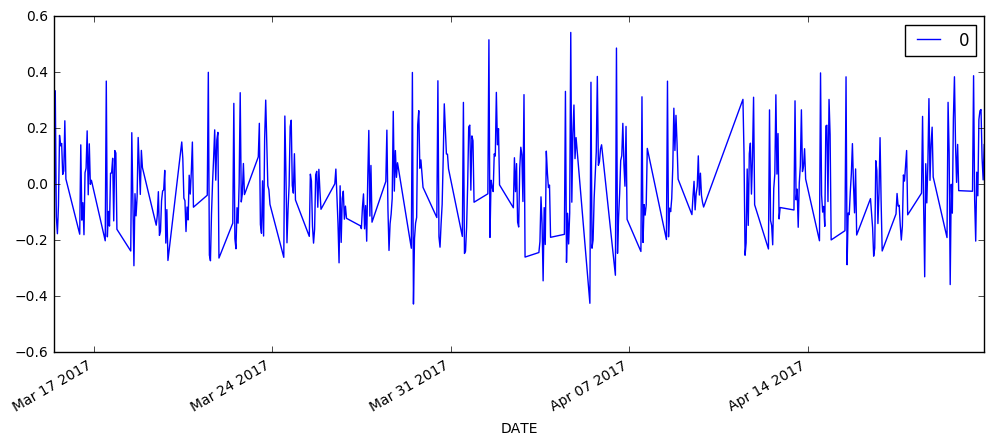

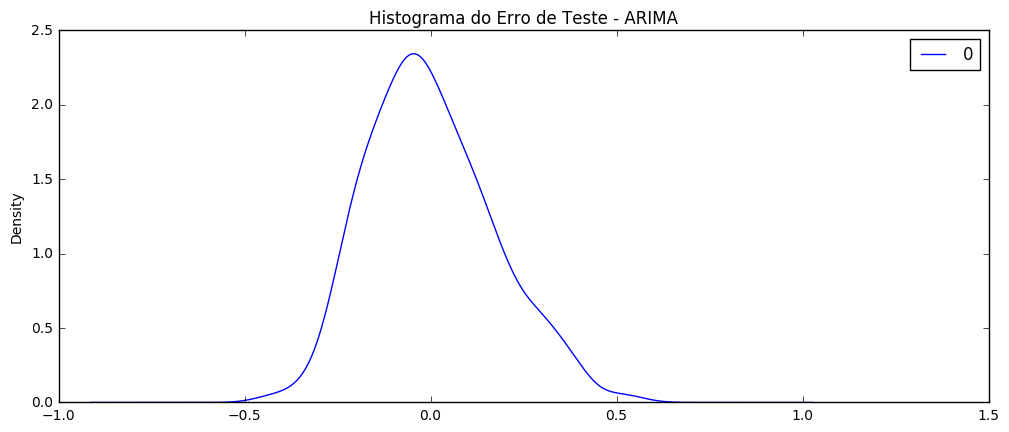

                0
count  427.000000
mean     0.000207
std      0.169222
min     -0.428034
25%     -0.123015
50%     -0.023048
75%      0.108489
max      0.541940


In [170]:
print(results_ARIMA.summary())
# plot residual errors
residuals = pd.DataFrame(results_ARIMA.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.title('Histograma do Erro de Teste - ARIMA')
plt.show()

print(residuals.describe())

In [54]:
#results_ARIMA.predict(start='2016-09-22 00:00:00', end='2016-09-22 23:00:00', exog=None, dynamic=False).plot()
results_ARIMA.predict(start=1000, end=8000, exog=None, dynamic=True).plot()
#forecast = results_ARIMA.forecast(steps=300, exog=None, alpha=0.05)[0].tolist()
#results_ARIMA.forecast(steps=48, exog=None, alpha=0.05)[0].tolist()
#plt.plot(forecast)

ValueError: Start must be <= len(endog)

In [113]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

DATE
2017-01-01 12:00:00    0.000430
2017-01-01 13:00:00   -0.013987
2017-01-01 14:00:00   -0.002260
2017-01-01 15:00:00   -0.003976
2017-01-01 16:00:00   -0.021994
dtype: float64


In [114]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

DATE
2017-01-01 12:00:00    0.000430
2017-01-01 13:00:00   -0.013557
2017-01-01 14:00:00   -0.015817
2017-01-01 15:00:00   -0.019794
2017-01-01 16:00:00   -0.041787
dtype: float64


In [115]:
#predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ds_log.ix[0], index=ds_log.index)
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

DATE
2017-01-01 11:00:00    0.056075
2017-01-01 12:00:00    0.056075
2017-01-01 13:00:00    0.056075
2017-01-01 14:00:00    0.056075
2017-01-01 15:00:00    0.056075
dtype: float64

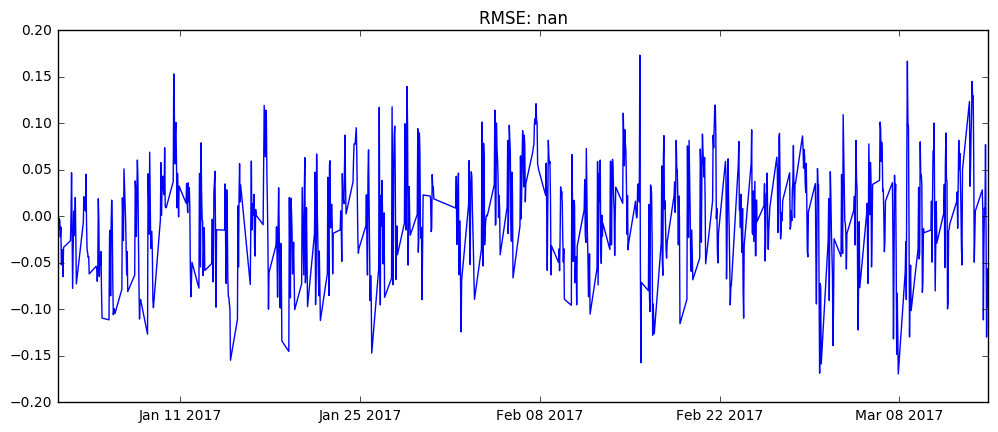

In [117]:
#predictions_ARIMA = predictions_ARIMA_log#np.exp(predictions_ARIMA_log)
predictions_ARIMA = predictions_ARIMA_diff#np.exp(predictions_ARIMA_log)
#plt.plot(train)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-train)**2)/len(train)))

In [247]:
train

MTS
2016-01-01 11:00:00    0.050847
2016-01-01 12:00:00    0.118644
2016-01-01 13:00:00    0.059322
2016-01-01 14:00:00    0.118644
2016-01-01 15:00:00    0.118644
2016-01-01 16:00:00    0.135593
2016-01-01 17:00:00    0.245763
2016-01-01 18:00:00    0.211864
2016-01-01 19:00:00    0.254237
2016-01-01 20:00:00    0.296610
2016-01-01 21:00:00    0.237288
2016-01-01 22:00:00    0.245763
2016-01-02 11:00:00    0.144068
2016-01-02 12:00:00    0.059322
2016-01-02 13:00:00    0.186441
2016-01-02 14:00:00    0.322034
2016-01-02 15:00:00    0.262712
2016-01-02 16:00:00    0.194915
2016-01-02 17:00:00    0.228814
2016-01-02 18:00:00    0.177966
2016-01-02 19:00:00    0.144068
2016-01-02 20:00:00    0.245763
2016-01-02 21:00:00    0.338983
2016-01-02 22:00:00    0.203390
2016-01-03 11:00:00    0.177966
2016-01-03 12:00:00    0.135593
2016-01-03 13:00:00    0.169492
2016-01-03 14:00:00    0.161017
2016-01-03 15:00:00    0.084746
2016-01-03 16:00:00    0.220339
                         ...   
2016

420

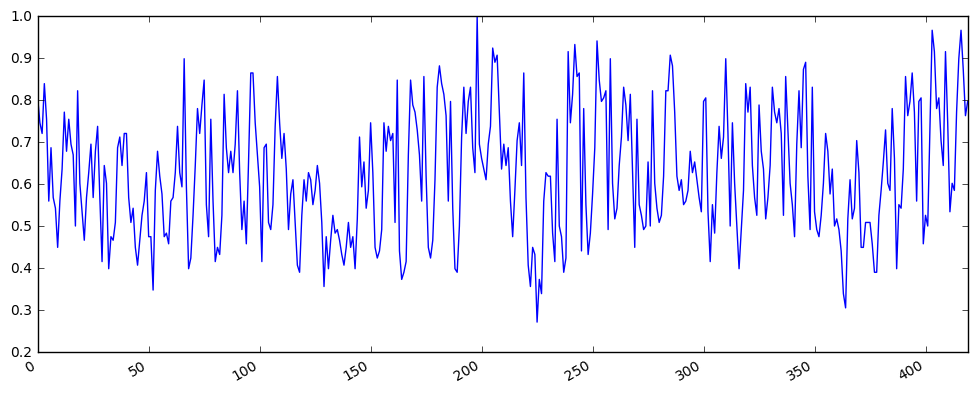

In [240]:
#ts = te['data_hsdpa']
#ts = (ts - ts.min()) / (ts.max() - ts.min())
test.plot(use_index=False)
len(test)

In [196]:
train_max_value = train.max()
train_min_value = train.min()
train_norm = (train - train.min()) / (train.max() - train.min())
denorm = train_norm*(train_max_value-train_min_value)+train_min_value
#denorm.plot()
#ts.plot()

test_max_value = test.max()
test_min_value = test.min()
test_norm = (test - test.min()) / (test.max() - test.min())
train_diff = train_norm - train_norm.shift()
test_diff = test_norm - test_norm.shift()

###train
model = ARIMA(train_norm, order=(5, 0, 5))  
train_results_ARIMA = model.fit(disp=-1) 

print(train_results_ARIMA.summary())
# plot residual errors
#residuals = pd.DataFrame(results_ARIMA.resid)
#residuals.plot()
#plt.show()
#residuals.plot(kind='kde')
#plt.title('Histograma do Erro de Teste - ARIMA')
#plt.show()

#print(residuals.describe())

C:\Anaconda2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:                  users   No. Observations:                  851
Model:                     ARMA(5, 5)   Log Likelihood                 656.443
Method:                       css-mle   S.D. of innovations              0.112
Date:                Mon, 11 Sep 2017   AIC                          -1288.886
Time:                        11:19:02   BIC                          -1231.929
Sample:                    01-01-2017   HQIC                         -1267.069
                         - 03-14-2017                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4625      0.103      4.470      0.000       0.260       0.665
ar.L1.users     1.0386      0.177      5.852      0.000       0.691       1.386
ar.L2.users    -0.6477      0.267     -2.427    

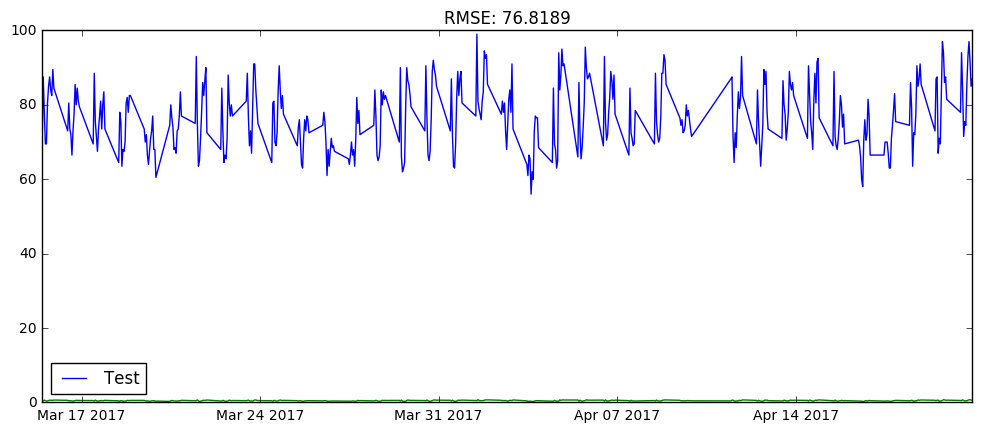

In [149]:
train_max_value = train.max()
train_min_value = train.min()
train_norm = (train - train.min()) / (train.max() - train.min())
denorm = train_norm*(train_max_value-train_min_value)+train_min_value
#denorm.plot()
#ts.plot()

test_max_value = test.max()
test_min_value = test.min()
test_norm = (test - test.min()) / (test.max() - test.min())
train_diff = train_norm - train_norm.shift()
test_diff = test_norm - test_norm.shift()

###train
model = ARIMA(train_norm, order=(1, 0, 1))  
train_results_ARIMA = model.fit(disp=-1)  

#predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
#predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
#train_predictions_ARIMA = pd.Series(train.ix[0], index=train.index)
#train_predictions_ARIMA = train_predictions_ARIMA.add(predictions_ARIMA_diff_cumsum,fill_value=0)

predictions_ARIMA_diff = pd.Series(train_results_ARIMA.fittedvalues, copy=True)
train_predictions_ARIMA = predictions_ARIMA_diff#np.exp(predictions_ARIMA_log)

###test
model = ARIMA(test_norm, order=(1, 0, 1))  
results_ARIMA = model.fit(disp=-1)  

#predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
##predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
#test_predictions_ARIMA = pd.Series(test.ix[0], index=test.index)
#test_predictions_ARIMA = test_predictions_ARIMA.add(predictions_ARIMA_diff_cumsum,fill_value=0)

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA = predictions_ARIMA_diff#np.exp(predictions_ARIMA_log)
plt.plot(test,label='Test')
plt.legend(loc='best')
plt.plot(predictions_ARIMA_diff,label='pred')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_diff-test)**2)/len(test)))

In [269]:
test_predictions_ARIMA


MTS
2016-03-15 18:00:00    0.805085
2016-03-15 19:00:00    0.805246
2016-03-15 20:00:00    0.819121
2016-03-15 21:00:00    0.837431
2016-03-15 22:00:00    0.816938
2016-03-16 11:00:00    0.826840
2016-03-16 12:00:00    0.902130
2016-03-16 13:00:00    0.924428
2016-03-16 14:00:00    0.987875
2016-03-16 15:00:00    1.055281
2016-03-16 16:00:00    1.152727
2016-03-16 17:00:00    1.200400
2016-03-16 18:00:00    1.214971
2016-03-16 19:00:00    1.174982
2016-03-16 20:00:00    1.174795
2016-03-16 21:00:00    1.143922
2016-03-16 22:00:00    1.138927
2016-03-17 11:00:00    1.144672
2016-03-17 12:00:00    1.220032
2016-03-17 13:00:00    1.158530
2016-03-17 14:00:00    1.191594
2016-03-17 15:00:00    1.251673
2016-03-17 16:00:00    1.337835
2016-03-17 17:00:00    1.377790
2016-03-17 18:00:00    1.391199
2016-03-17 19:00:00    1.375410
2016-03-17 20:00:00    1.414384
2016-03-17 21:00:00    1.405057
2016-03-17 22:00:00    1.370712
2016-03-18 11:00:00    1.410285
                         ...   
2016

In [147]:
import math
def mse(y,yhat,n):
    tmp = 0.0

    for i in range(0,n):
        tmp += ((y[i]-yhat[i])**2)

    return tmp/n

def rmse(y,yhat,n):

    return math.sqrt(mse(y,yhat,n))

def mape(y,yhat,n):
    tmp = 0.0

    for i in range(0,n):
        tmp += math.fabs(y[i]-yhat[i])/y[i]

    return (tmp/n)


In [158]:
from sklearn.metrics import mean_absolute_error
import math
result_mae  = mean_absolute_error(denorm_test,test_pred)
result_mse = mse(denorm_test,test_pred,len(test))
result_rmse = rmse(denorm_test,test_pred,len(test))
result_mape = mape(denorm_test,test_pred,len(test))
print(result_mse,result_rmse,result_mae,result_mape)

(52.823926231104956, 7.268007032956487, 5.8291817820129239, 0.076128154915165017)


In [159]:
from sklearn.metrics import mean_absolute_error
import math
result_mae  = mean_absolute_error(denorm,train_pred)
result_mse = mse(denorm,train_pred,len(train))
result_rmse = rmse(denorm,train_pred,len(train))
result_mape = mape(denorm,train_pred,len(train))
print(result_mse,result_rmse,result_mae,result_mape)

(40.267478073680856, 6.345666085895227, 4.9174620218395528, 0.075288632044762563)


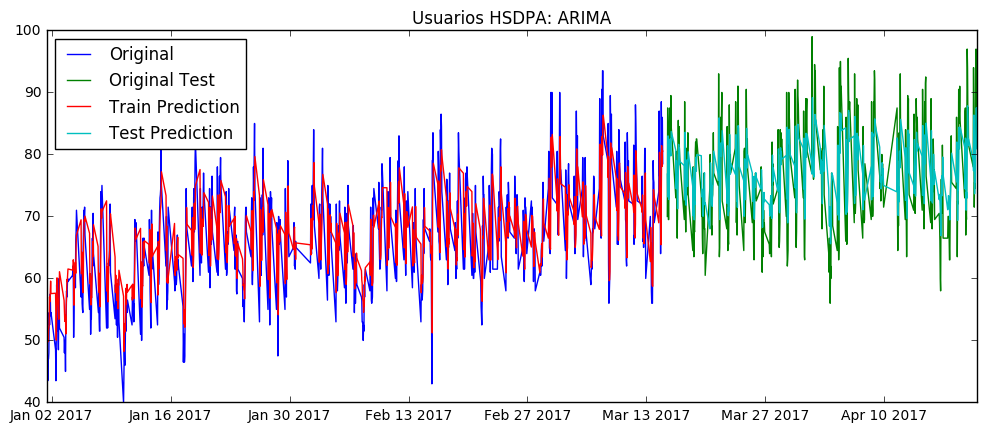

In [150]:
#train_max_value = train.max()
#train_min_value = train.min()
#train_norm = (train - train.min()) / (train.max() - train.min())
#denorm = train_norm*(train_max_value-train_min_value)+train_min_value
#denorm.plot()
#ts.plot()

#test_max_value = test.max()
#test_min_value = test.min()
#test_norm = (test - test.min()) / (test.max() - test.min())
#train_diff = train_norm - train_norm.shift()
#test_diff = test_norm - test_norm.shift()

denorm = train_norm*(train_max_value-train_min_value)+train_min_value
denorm_test = test_norm*(test_max_value-test_min_value)+test_min_value
test_pred = predictions_ARIMA_diff*(test_max_value-test_min_value)+test_min_value
train_pred = train_predictions_ARIMA*(train_max_value-train_min_value)+train_min_value

#predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
#predictions_ARIMA = predictions_ARIMA_diff#np.exp(predictions_ARIMA_log)
#plt.plot(test,label='Test')
#plt.legend(loc='best')
#plt.plot(predictions_ARIMA_diff,label='pred')


plt.plot(denorm,label='Original')
plt.plot(denorm_test,label='Original Test')
plt.plot(train_pred,label='Train Prediction')
plt.plot(test_pred,label = 'Test Prediction')
plt.legend(loc='best')
plt.title('Usuarios HSDPA: ARIMA')
plt.show()

In [160]:
denorm_test.shape

(427L,)

In [123]:
ts.min()

0.0